In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import data
species_data = pd.read_csv('species_info.csv', encoding='utf-8')
observations = pd.read_csv('observations.csv', encoding='utf-8')
species_data.head(20)





,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


Let's see what's the size of our data and how many unique entries we have per column

In [3]:
print(species_data.columns)
print(species_data.nunique())
print( 'length species: ', len(species_data))

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64
length species:  5824


Now let's see how many objects we have per category and how many we have in conservation type per category

            category  scientific_name  common_names  conservation_status
0          Amphibian               80            80                    7
1               Bird              521           521                   79
2               Fish              127           127                   11
3             Mammal              214           214                   38
4  Nonvascular Plant              333           333                    5
5            Reptile               79            79                    5
6     Vascular Plant             4470          4470                   46


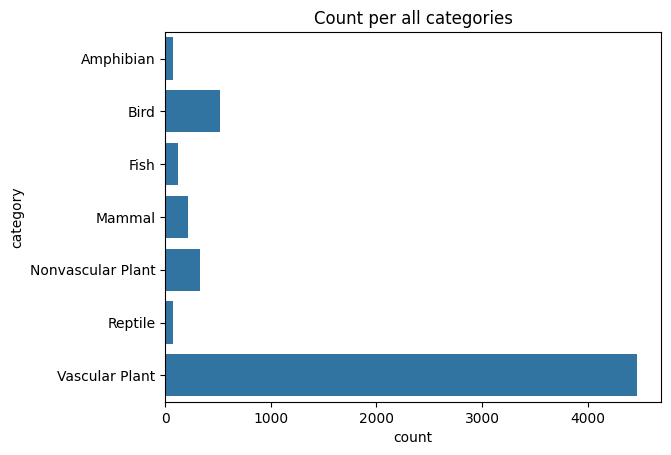

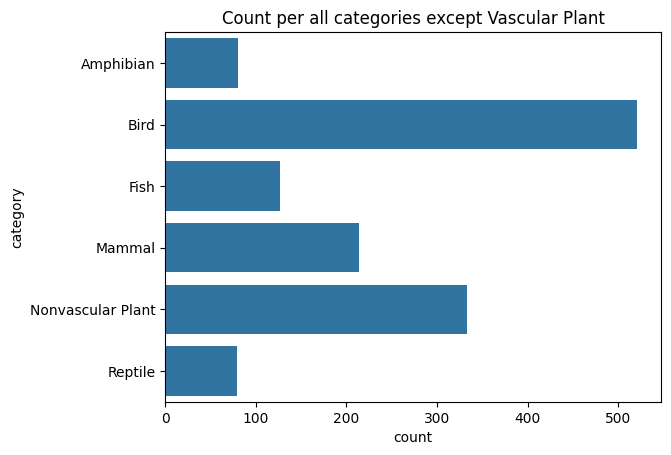

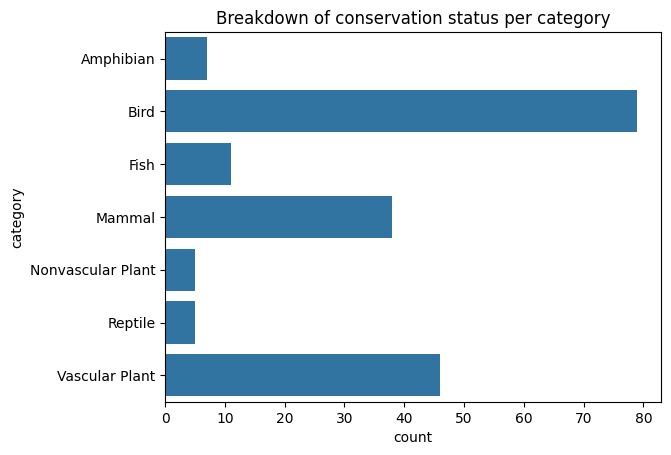

<Figure size 640x480 with 0 Axes>

In [4]:
#let's see how many animals we have per category and per conservation status
grouped_category = species_data.groupby('category').count().reset_index()
print(grouped_category)

# plt.figure(figsize=(15,8))
# plt.subplot(1,2,1)
sns.barplot(x='scientific_name', y='category', data=grouped_category)
plt.xlabel('count')
plt.title('Count per all categories')
plt.show()
plt.clf()
# # plt.clf()
# plt.subplot(1,2,2)
sns.barplot(x=grouped_category[grouped_category.category != 'Vascular Plant' ].scientific_name, y=grouped_category[grouped_category.category != 'Vascular Plant' ].category, data=grouped_category)
plt.xlabel('count')
plt.title('Count per all categories except Vascular Plant')
plt.show()
plt.clf()
sns.barplot(x=grouped_category.conservation_status, y=grouped_category.category, data=grouped_category)
plt.xlabel('count')
plt.title('Breakdown of conservation status per category')
plt.show()
plt.clf()

From graphs we see that Vascular plants are the most numbered group with 521 entries. We have the most entries in conservation status in birds category

In [5]:
#let's have a look at the conservation status

conservation_status = species_data[['scientific_name', 'conservation_status']].groupby('conservation_status').count().reset_index()
print(f"na values:{species_data.conservation_status.isna().sum()}")
conservation_status.head()

na values:5633


,conservation_status,scientific_name
0,Endangered,16
1,In Recovery,4
2,Species of Concern,161
3,Threatened,10


Most of the species are species of concern

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85 length observations:  23296
scientific_name    23296
park_name          23296
observations       23296
dtype: int64
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
                             park_name  observations
0                  Bryce National Park        576025
1  Great Smoky Mountains National Park        431820
2            Yellowstone National Park       1443562
3               Yosemite National Park        863332
                             

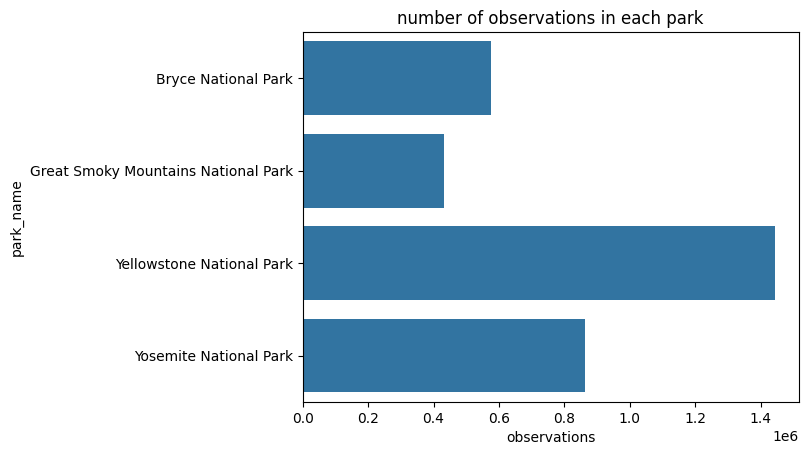

In [6]:
print(observations.head(), 'length observations: ', len(observations))
print(observations.count()) # we see that this data is clean
# print(observations.groupby('scientific_name').count())
print(observations.park_name.unique())


#observations total in parks 
# print(observations.groupby('park_name').observations.sum().reset_index)

# observations_in_park = observations[['park_name', 'observations']].groupby('park_name').observations.sum().reset_index
observations_in_park = observations[['park_name', 'observations']].groupby('park_name').observations.sum().reset_index()
print(observations_in_park)
sns.barplot(y='park_name', x='observations', data=observations_in_park)
plt.title("number of observations in each park")
# plt.show()
# plt.clf()
total_observations = observations_in_park.observations.sum()
observations_in_park['percentage of total'] = (observations_in_park.observations / total_observations) * 100
print(observations_in_park)

There are 4 national parks and Yellowstone National Park has the most observations from all of the parks consisting of 43%.

In [7]:
# what animal do we see most often?

print(observations.observations.max())
index_maximum_animal = observations.observations.idxmax()
max_row = observations.loc[index_maximum_animal]
print(max_row)

print(observations.scientific_name[observations.observations.max()])

321
scientific_name       Lycopodium tristachyum
park_name          Yellowstone National Park
observations                             321
Name: 11281, dtype: object
Juncus uncialis


We have to clean data a little bit. All NaN values in conservation_status should be replaced with Not Endagered

In [8]:
species_data.fillna('Not Endagered', inplace=True)
species_data.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
Not Endagered         5633
Species of Concern     161
Threatened              10
dtype: int64

check if we have some null values

In [9]:
species_data.conservation_status.isna().sum()

0

Let's see what sorts of animals are in each conservation status category:

In [10]:
conservation_status_breakdown = species_data[species_data.conservation_status != "Not Endagered"].groupby(['conservation_status', 'category'])['scientific_name'].count().reset_index()


conservation_status_breakdown = conservation_status_breakdown.reset_index().pivot(index='conservation_status', columns='category', values='scientific_name')
conservation_status_breakdown.head()

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


In endagered are just few scpecies, but the most are in mammals 7 in total. No endagered plant or reptile. Species of concern are mostly in order, birds 72, vascular plant 43 and mammals 28

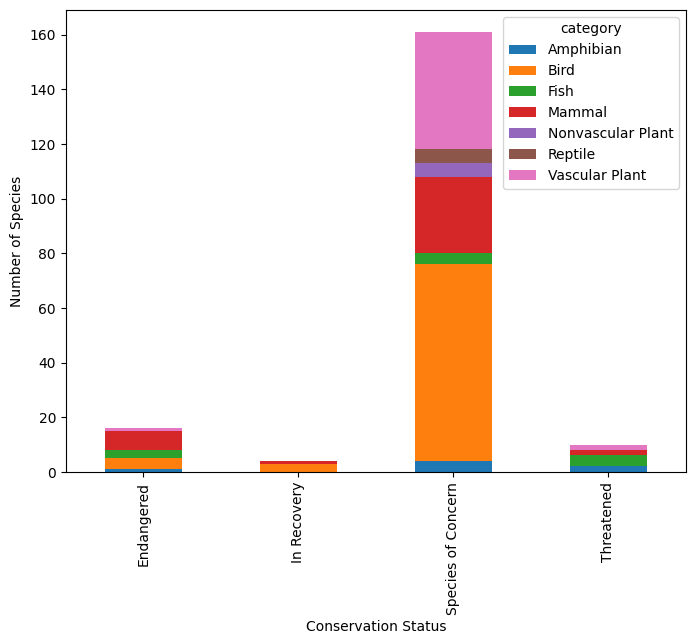

In [11]:
ax = conservation_status_breakdown.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

Let's see what percentage in each category is protected

In [12]:
not_protected = species_data[species_data.conservation_status == 'Not Endagered'].groupby('category').conservation_status.count()
is_protected = grouped_category[['category', 'conservation_status']]
# is_protected.rename(columns={'conservation_status': 'protected'}, inplace=True)
is_protected = is_protected.merge(not_protected, on='category', how='left')
is_protected.columns = ['category', 'is_protected', 'not_protected']
is_protected['percent_protected'] = (is_protected.is_protected / (is_protected.is_protected + is_protected.not_protected)) * 100
is_protected

,category,is_protected,not_protected,percent_protected
0,Amphibian,7,73,8.750000
1,Bird,79,442,15.163148
2,Fish,11,116,8.661417
3,Mammal,38,176,17.757009
4,Nonvascular Plant,5,328,1.501502
5,Reptile,5,74,6.329114
6,Vascular Plant,46,4424,1.029083


We see that 15% birds are protected and also that they are the largest group of eeding attention category 

Let's see if any category has statistically higher chance of need to be protected than the other. <br>
This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates.

In [13]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

p value is equal to 0.69 what is much above 0.05 so we can conclude that mammals and birds have unlikely association therefore are independent variables.

In [14]:
contingency2 = [[38, 176],
              [5, 74]]
chi2_contingency(contingency2)


Chi2ContingencyResult(statistic=5.139702724228909, pvalue=0.02338465214871547, dof=1, expected_freq=array([[ 31.40614334, 182.59385666],
       [ 11.59385666,  67.40614334]]))

p value is equal to 0.023 what is below 0.05 so we can conclude that  Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles. 

SPECIES

We could analyse all scategories but as an example let's focus on mammals

In [15]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species_data[species_data.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [16]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [17]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

In [18]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
51,Bat,23
100,Shrew,18
135,Myotis,17
175,Mouse,16
6,Chipmunk,13
30,Squirrel,12
67,American,12
95,Vole,11
10,Eastern,11
81,Western,10


In [19]:
species_data['is_protected'] = species_data.conservation_status != 'Not Endagered'


In [20]:
species_data['is_bat'] = species_data.common_names.str.contains(r"\bBat\b", regex = True)

species_data.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endagered,False,False
1,Mammal,Bos bison,"American Bison, Bison",Not Endagered,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not Endagered,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not Endagered,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not Endagered,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,Not Endagered,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",Not Endagered,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [21]:
species_data[species_data.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,Not Endagered,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",Not Endagered,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,Not Endagered,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,Not Endagered,False,True


In [22]:
bat_observations = observations.merge(species_data[species_data.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,Not Endagered,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


In [23]:
bat_observations.groupby('park_name').observations.sum().reset_index()


,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [24]:

obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


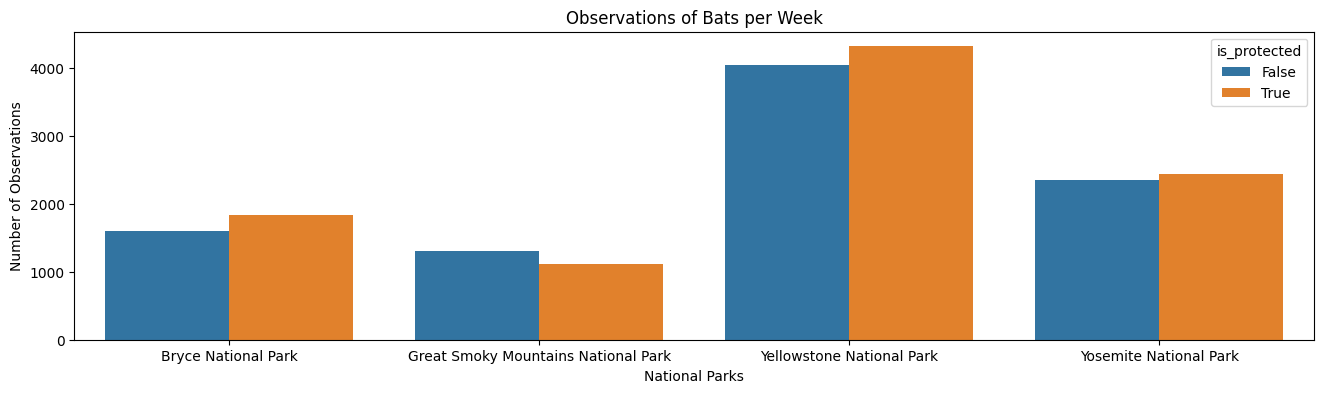

In [25]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

    Fruit  A  B  E  C  D
0   guava  4  5  4  3  4
1   apple  1  3  2  5  3
2  orange  3  1  1  1  3
3   mango  2  1  2  1  3


,Fruit,A,B,E,C,D,mean_rating
0,guava,4,5,4,3,4,4.0
1,apple,1,3,2,5,3,2.8
2,orange,3,1,1,1,3,1.8
3,mango,2,1,2,1,3,1.8


Number of fields that are categorical variables: 7
Fraction of entries in the 'accep' column that have the entry 'unacc': 0.7002314814814815
